In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

from midoss_utils import *

Dispersion is calculated as follows:

Me%Var%MDispersedDT = (Me%Var%MassOil / (1.0-Me%Var%MWaterContent)               &
    *(1.0-Me%Var%VWatercontent)) * P_Star * Me%ExternalVar%WaveWCC   &
                               / (Me%ExternalVar%WavePeriod)
                               
With P_Star as a function of characteristic diameter, which is a function of density, viscosity, slick thickness and other things.                                

In [2]:
# set figure fontsizes
fs=12 
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

In [4]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/')

# This date includes 2 bunker-c cases
oil_types = ["dilbit", "akns", "diesel", "bunkercAK"]

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],
                            ['MEvaporated', 
                             'MDispersed', 
                             'MDissolved',
                             'MBio',
                             'MassOil',
                             'VolOilBeached',
                             'Density',
                             'VWaterContent',
                             'MWaterContent',
                             'P_Star',
                             'CharacteristicDiameter',
                             'Viscosity',
                             'Thickness'
                            ]
                           )
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]

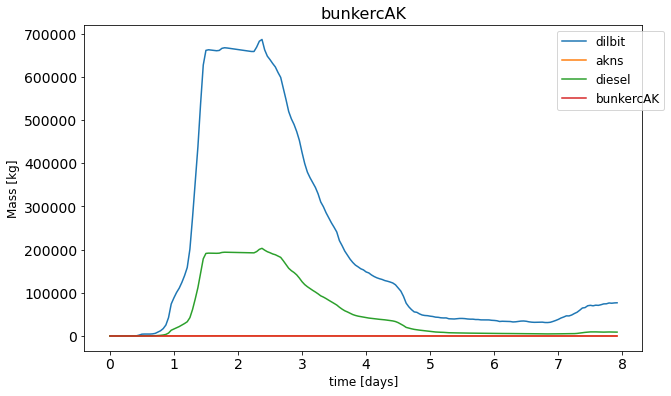

In [9]:
for oil in oil_types:
    ax = results[oil]['MDispersed'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title('Dispersion by oil type')
    ax.legend(bbox_to_anchor=(1.05, 1))

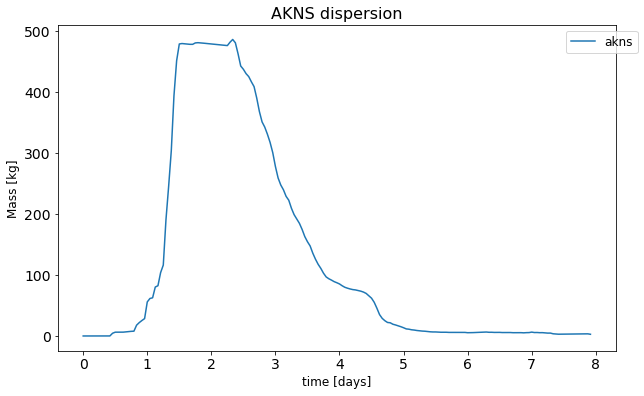

In [11]:
ax = results["akns"]['MDispersed'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title("AKNS dispersion")
ax.legend(bbox_to_anchor=(1.05, 1))

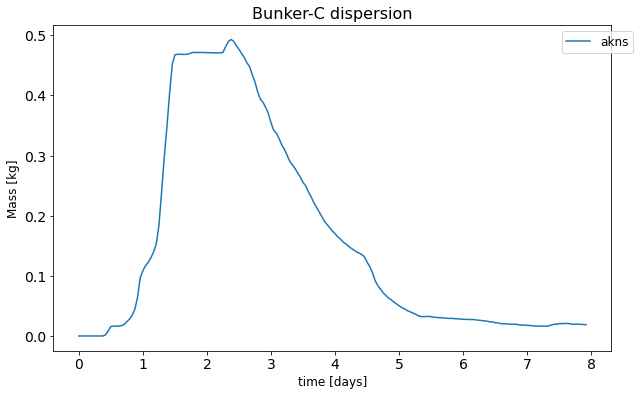

In [12]:
ax = results["bunkercAK"]['MDispersed'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title("Bunker-C dispersion")
ax.legend(bbox_to_anchor=(1.05, 1))

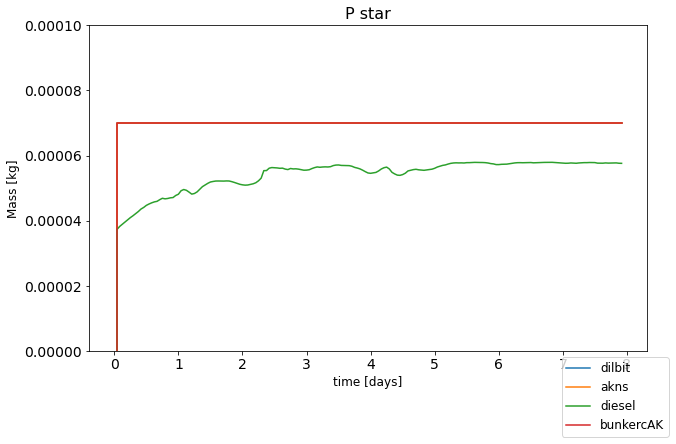

In [19]:
for oil in oil_types:
    ax = results[oil]['P_Star'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title('P star')
    ax.set_ylim(0,1e-4)
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

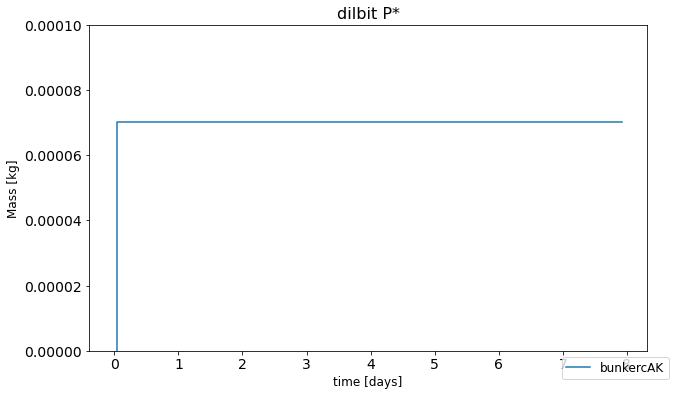

In [20]:
ax = results['dilbit']['P_Star'].plot(
    linewidth=1.5,
    #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14,
    label=oil
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title('dilbit P*')
ax.set_ylim(0,1e-4)
ax.legend(bbox_to_anchor=(1.05, 1e-5))

### P* is a function of density, viscosity and thickness...checking which of these holds influence

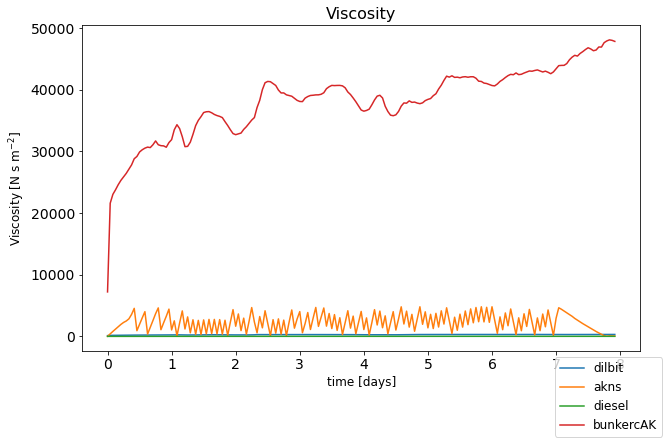

In [44]:
for oil in oil_types:
    ax = results[oil]['Viscosity'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel(r'Viscosity [N s m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Viscosity')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

Text(0.5, 1.0, 'diesel')

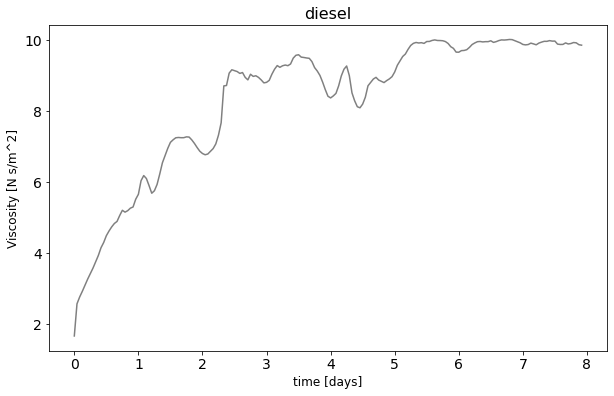

In [33]:
ax = results["diesel"]['Viscosity'].plot(
    linewidth=1.5,
    color = 'grey',
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Viscosity [N s m$^{-2}$]')
ax.set_xlabel('time [days]')
ax.set_title('diesel')

Text(0.5, 1.0, 'dilbit')

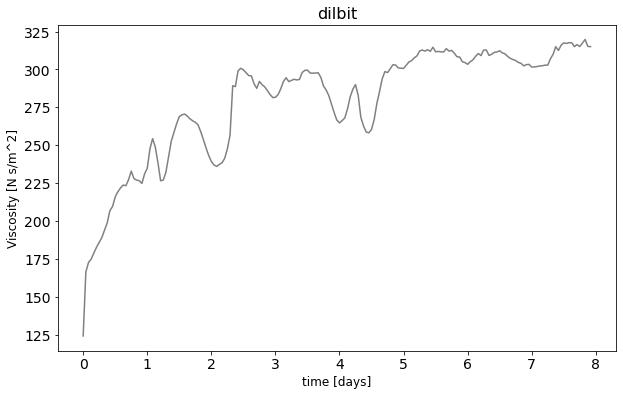

In [35]:
ax = results["dilbit"]['Viscosity'].plot(
    linewidth=1.5,
    color = 'grey',
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Viscosity [N s m$^{-2}$]')
ax.set_xlabel('time [days]')
ax.set_title('dilbit')

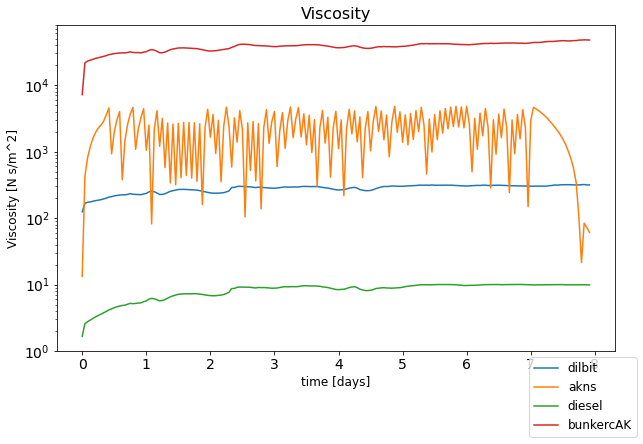

In [38]:
for oil in oil_types:
    ax = results[oil]['Viscosity'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Viscosity [N s m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Viscosity')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

#### I'm concerned about this AKNS viscosity

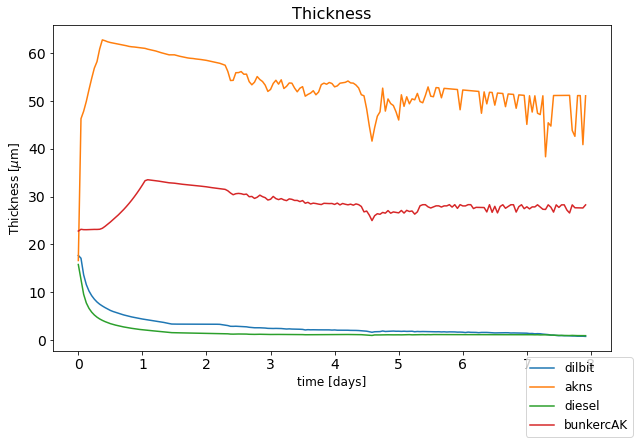

In [41]:
for oil in oil_types:
    ax = results[oil]['Thickness'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel(r'Thickness [$\mu$m]')
    ax.set_xlabel('time [days]')
    ax.set_title('Thickness')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))

### Both AKNS and Bunker-C are really thick, which I think accounts for the lack of dispersion

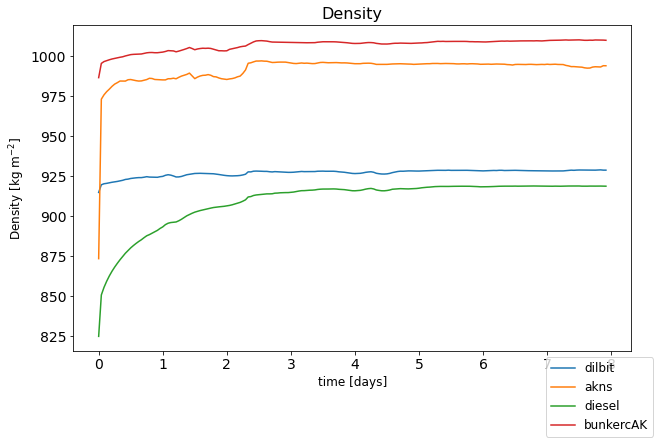

In [45]:
for oil in oil_types:
    ax = results[oil]['Density'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14,
        label=oil
    )
    ax.set_ylabel('Density [kg m$^{-2}$]')
    ax.set_xlabel('time [days]')
    ax.set_title('Density')
    #ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1e-5))